<a href="https://colab.research.google.com/github/andrewng88/Deep-Learning/blob/master/pytorch_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Self Generate dataset


In [0]:
#y= a.x_1 + b(1)

In [0]:
#100 data points
n = 100

In [75]:
x = torch.ones(n,2)  #Matrix shape 100 x 2 with values of 1,1
x[:,0].uniform_(-1,1) #Matrix 100 x 2 with values of uniform(-1,1) , 1
x[:5] # represents x_1 and 1

tensor([[ 0.9048,  1.0000],
        [-0.4071,  1.0000],
        [-0.7501,  1.0000],
        [ 0.0217,  1.0000],
        [-0.8052,  1.0000]])

In [99]:
#coefficient 3(slope) and 2(intercept)
a = torch.tensor([3.,2]); 
print(x.shape)
print(a.shape )
print((x@a).shape)

torch.Size([100, 2])
torch.Size([2])
torch.Size([100])


In [103]:
noise = torch.rand(n)

#generate y_actual
y = x@a + noise
y.shape

torch.Size([100])

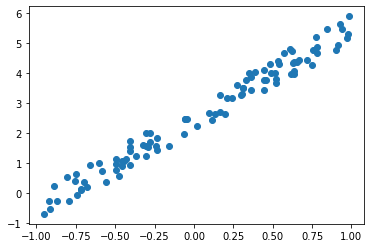

In [109]:
plt.scatter(x[:,0],y);

In [0]:
def mse(yhat,y):
  return ((y-yhat)**2).mean()

In [119]:
#assume gradient and intercept is (2,-2)

#coefficient 2(slope) and -2(intercept)
a = torch.tensor([-5.,5.]); 
yhat = x@a
mse(yhat,y)

tensor(24.9246)

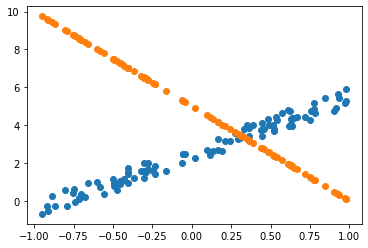

In [120]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],yhat);

Gradient Descent

In [122]:
# we want to determine a ( gradient and intercept)
# requires_grad means computation on a will be tracked
a = torch.tensor([-5.,5.],requires_grad=True);a

tensor([-5.,  5.], requires_grad=True)

In [0]:
def update():
    #calculate y_hat
    y_hat = x@a
    #calculate loss
    loss = mse(y, y_hat)
    #print loss every 10 loops
    if t % 10 == 0: print(loss)
    #compute the derivatives, you can call .backward()
    loss.backward()
    # To prevent tracking history (and using memory), you can also wrap the code block in with torch.no_grad():. 
    with torch.no_grad():
        a.sub_(lr * a.grad) # w(t) = w(t-1) - lr dL/dw(t-1)
        a.grad.zero_()
        
#L(x,w)=mse(m(x,w),y)+ wd sum(w**2)

So the fact that the gradients are accumulated allows you to get the correct gradient for all the computations that you do with a given Variable even if you use it at multiple places in convoluted ways.
The drawback here is that you have to manually reset the values to 0 so that the gradients computed previously do not interfere with the ones you are currently computing.

In [124]:
# run backprop starting from 1e-1 with 100 epochs
lr = 1e-1
for t in range(100): 
  update()

tensor(24.9246, grad_fn=<MeanBackward0>)
tensor(5.8872, grad_fn=<MeanBackward0>)
tensor(1.6314, grad_fn=<MeanBackward0>)
tensor(0.4964, grad_fn=<MeanBackward0>)
tensor(0.1912, grad_fn=<MeanBackward0>)
tensor(0.1092, grad_fn=<MeanBackward0>)
tensor(0.0871, grad_fn=<MeanBackward0>)
tensor(0.0811, grad_fn=<MeanBackward0>)
tensor(0.0795, grad_fn=<MeanBackward0>)
tensor(0.0791, grad_fn=<MeanBackward0>)


In [129]:
# the optimized parameter for a
a

tensor([3.0194, 2.4695], requires_grad=True)

In [125]:
#all the x-values
x@a.detach().numpy()

tensor([ 5.2008,  1.2407,  0.2054,  2.5350,  0.0390,  4.0833,  0.1913,  0.3108,
         1.5601,  2.2958,  3.8480,  3.4629,  4.3802,  1.4987,  3.6440,  4.6398,
         5.0154,  3.9225,  2.7643,  2.3455,  1.5524,  4.3843,  1.6358,  5.2382,
         1.2539,  1.2425,  2.9624,  1.7333,  5.4326,  3.3883,  0.3542,  2.3077,
        -0.4005,  3.1981,  2.8136,  4.0477,  5.2999,  4.8214,  5.4124,  4.1060,
         3.8042,  0.0737,  0.2998,  4.1992,  4.0308,  1.0871,  4.4366,  3.0997,
         4.7385,  3.4119,  3.5620,  1.0957,  5.4204,  0.7852,  1.7708,  1.5862,
         1.9834,  3.9464,  1.1326,  0.4786,  1.5585,  4.3897,  1.1746,  0.7076,
         3.0569,  4.4769, -0.3030,  3.5669,  4.8161,  1.0406,  4.7515, -0.2049,
         3.3643,  0.2327,  3.5285,  4.3577,  0.9791,  1.7561,  3.8146,  4.8188,
         4.3258,  4.0479, -0.1593,  1.3608, -0.2845,  4.3624,  3.8070,  4.3168,
         2.2838,  0.6443,  1.2397,  2.8675,  3.2921,  0.9669,  0.4298,  1.6325,
         5.2769,  2.9785,  3.4139,  0.98

Scatter plot of predicted vs actual after backprop

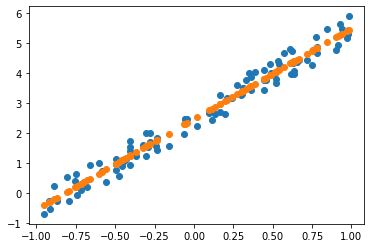

In [126]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a.detach().numpy());

Animation of Gradient Descent

In [128]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

a = torch.tensor([-5.,5.],requires_grad=True)

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a.detach().numpy())
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a.detach().numpy())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)